In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import seaborn as sns
import os
#from Bio import SeqIO
import src.human_sequences, src.rna_analysis
import json 
import pickle#auf server laden nicht vergessen
from numpy.linalg import matrix_power
#import pyranges as pr
#import statsmodels.api as sm
sns.set_style("whitegrid")
plt.rc('font',size=16)

In [2]:
print(os.getcwd())

/Volumes/ag_ohler/jdemoli/bachelorgit


In [29]:
color_palette_1= ["#562C2C","#F2542D","#F5DFBB","#0E9594","#127475"]
color_palette_2=['#EF476F','#FFD166','#06D6A0','#118AB2','#073B4C']

In [2]:
seqs=pd.read_csv("data/new_dataset.csv")
seqs.set_index('SeqID', inplace=True)
seqs

,Sequence,Group,MFE,ss,Sequence Length,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,...,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length,sliding window mfe
SeqID,,,,,,,,,,,,,,,,,,,,,
ENST00000641515.2,CCCAGAUCUCUUCAGUUUUUAUGCCUCAUUCUGUGAAAAUUGCUGU...,Human,-9.500000,...((((..(..(((((((((((........)))))))))))..)....,60,0.400000,3.0,2.0,7.500000,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.158333
ENST00000616016.5,GGCGGCGGAGUCUCCCAAGUCCCCGCCGGGCGGGCGCGCGCCAGUG...,Human,-321.000000,(((((.(((.(......).)))))))).(((((((((.(((........,509,0.809430,18.0,6.0,158.306667,318.0,...,18.0,1.0,1.0,297.0,297.0,1.0,0.0,228.0,228.0,-0.629000
ENST00000342066.8,GCAGAGCCCAGCAGAUCCCUGCGGCGUUCGCGAGGGUGGGACGGGA...,Human,-30.000000,...((((((.((((....)))))).))))(((....(.((((.......,90,0.666667,2.0,3.0,36.000000,42.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,42.0,-0.333333
ENST00000338591.8,GGGAGUGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCUCC...,Human,-45.200001,....(((.....)))....(((((((((((((((((...((........,110,0.745455,1.0,1.0,63.000000,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440000
ENST00000379410.8,AGGAGGCUGUGGACAGGGACCCAGACUUGCCGACCUGUACGACUCU...,Human,-12.900000,....((((((.((((((....((....))....))))).).))......,50,0.640000,0.0,6.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq_399996,UAGAAACGGCCGCAUCGACUCCGAGCCGACACGCCGUAGAGAGCGG...,Random_dl_gc_adjusted,-57.200001,.....(((((((..(((....)))..))....))))).(((.((((...,236,0.546610,7.0,1.0,45.000000,108.0,...,108.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,9.0,-0.248000
seq_399997,CCAGUCCUGGAGGUGCUCAAGCGGCGGUGGAGCACAGCUCGUUCGG...,Random_dl_gc_adjusted,-60.299999,.....(((((.(((((((..((...(((.(.((....(((...(((...,161,0.627329,4.0,4.0,33.500000,69.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.357000
seq_399998,CUGAGUGGUGUCAGGGCCGUACCCAAUCUACACCUAGUGACGGGGA...,Random_dl_gc_adjusted,-30.900000,......(((((..(((.....))).....)))))((((.(.((((....,113,0.592920,6.0,5.0,29.833333,51.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,12.0,-0.295000


In [4]:
seqs.columns.unique()

Index(['Sequence', 'Group', 'MFE', 'ss', 'Sequence Length', 'GC Content',
       'all uORFs', 'all ouORFs', 'all mean uORF lengths',
       'all max uORF lengths', 'AUG_uORFs', 'CUG_uORFs', 'GUG_uORFs',
       'UUG_uORFs', 'ACG_uORFs', 'AUG_ouORFs', 'CUG_ouORFs', 'GUG_ouORFs',
       'UUG_ouORFs', 'ACG_ouORFs', 'AUG_mean_uORF_length',
       'CUG_mean_uORF_length', 'GUG_mean_uORF_length', 'UUG_mean_uORF_length',
       'ACG_mean_uORF_length', 'AUG_max_uORF_length', 'CUG_max_uORF_length',
       'GUG_max_uORF_length', 'UUG_max_uORF_length', 'ACG_max_uORF_length',
       'AUG_frame1_uORFs', 'AUG_frame1_ouORFs', 'AUG_frame1_mean_uORF_length',
       'AUG_frame1_max_uORF_length', 'AUG_frame2_uORFs', 'AUG_frame2_ouORFs',
       'AUG_frame2_mean_uORF_length', 'AUG_frame2_max_uORF_length',
       'AUG_frame3_uORFs', 'AUG_frame3_ouORFs', 'AUG_frame3_mean_uORF_length',
       'AUG_frame3_max_uORF_length', 'CUG_frame1_uORFs', 'CUG_frame1_ouORFs',
       'CUG_frame1_mean_uORF_length', 'CUG_frame1

In [4]:
seqs.to_csv("data/new_dataset.csv")

In [3]:
fishseqs=pd.read_csv("data/fish_mfe.csv")
fishseqs.set_index('SeqID', inplace=True)
fishseqs.drop(columns=['Unnamed: 0'], inplace=True)
fishseqs.replace({'Group':'Fish'},{'Group':'Zebrafish'},inplace=True)
fishseqs

,Sequence,Sequence Length,Group,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,AUG_uORFs,CUG_uORFs,...,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length,sliding window mfe
SeqID,,,,,,,,,,,,,,,,,,,,,
ENSDART00000087426,AUAUUAUGAACAGUUUUGAUUGCUUUAUUAAAAACAACACAAACAA...,6784,Zebrafish,0.392246,504.0,2.0,69.653558,579.0,106.0,112.0,...,222.0,24.0,0.0,86.125000,456.0,23.0,0.0,57.130435,186.0,-0.333000
ENSDART00000145931,CGUUAAUUUUGCAGAAUCACUGUGCUUAUCACUGCGUGACAAGCUG...,4627,Zebrafish,0.417765,300.0,7.0,52.137937,351.0,102.0,66.0,...,12.0,6.0,0.0,31.500000,57.0,7.0,0.0,85.285714,213.0,-0.291000
ENSDART00000108943,AUGAAAAUGGUGGAUAUUGUAGCGCAGAAAAUGCCAUCAGAGAGCG...,4320,Zebrafish,0.474537,181.0,8.0,64.365371,414.0,51.0,65.0,...,0.0,12.0,0.0,26.750000,69.0,7.0,1.0,55.285714,165.0,-0.354000
ENSDART00000122002,UCAGUAAAAGCCUUCUCUUUAUUAUUUUUUUCUAUUAUAUAUUCUU...,4141,Zebrafish,0.358609,292.0,7.0,46.211328,219.0,81.0,62.0,...,141.0,11.0,0.0,19.909091,72.0,9.0,1.0,43.000000,111.0,-0.315000
ENSDART00000154243,UAUCAAACCUGUAAAAUGUCUAAGAAUAGAUUGAGGGCAUCAAACU...,2863,Zebrafish,0.338456,188.0,2.0,52.797355,339.0,47.0,46.0,...,210.0,2.0,0.0,42.000000,63.0,3.0,0.0,47.000000,66.0,-0.333000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000162022,GCGCUGACGUCACUCGAGCUCUGAAA,26,Zebrafish,0.576923,2.0,1.0,19.500000,21.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,18.000000,18.0,-0.092308
ENSDART00000126110,AGAAUCGGUGGGACAAGGCUGUGGUC,26,Zebrafish,0.576923,0.0,3.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.088462
ENSDART00000076082,GUGUCUGGGAGAAGGAUCGCAGCUCC,26,Zebrafish,0.615385,0.0,2.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.207692


In [2]:
new_seqs=pd.read_csv('data/small_dataset.csv')
new_seqs.set_index('SeqID',inplace=True)
new_seqs['Sequence Length']=new_seqs.Sequence.apply(len)
new_seqs

,Sequence,Group,Sequence Length,GC Content
SeqID,,,,
seq_0,UCAGGAUCCUGACGGGAAAUGGGCCGCAAGGCACUGUUUAGCAUGC...,monos_adjusted,86,0.534884
seq_1,ACCCGUCUGACGGGUGAAAGUGCUUCCAGGAUGUACCUAGGGGAAA...,monos_adjusted,119,0.571429
seq_2,GCUUGCGCAGUCCGCAUGCCGCGGCGGGGGCUUUUUGAGCGGCAGU...,monos_adjusted,563,0.630551
seq_3,UACUGUCCCCCACAUAAUAUGGGGAUGGAAUACCGGUACGCCUGCA...,monos_adjusted,361,0.598338
seq_4,CUCGAAAGGGUCAACUCUCAGAAGGGCGGGCUUAGUGUUUGAAGGG...,monos_adjusted,151,0.615894
...,...,...,...,...
seq_99995,UAGAAACGGCCGCAUCGACUCCGAGCCGACACGCCGUAGAGAGGGG...,monos_adjusted,236,0.529661
seq_99996,CCAGUCCUGGAGGUGCUCAAGAGGCGGUGGAGCACAGAUCGUUCGG...,monos_adjusted,161,0.596273
seq_99997,CUGAGUGGUGUCAGGGCCGUACCCAAUCUACACCUAGUGAGGGGGA...,monos_adjusted,113,0.584071


In [ ]:
with open('data/wrongseqIDs.json','r') as f:
    wrongseqIDs=json.load(f)


In [ ]:
corr_mfe_seqs=mfe_seqs.drop(wrongseqIDs)
corr_mfe_seqs

In [4]:
fishseqs=pd.read_csv('data/fish_uORFstats.csv')
fishseqs.set_index('SeqID',inplace=True)
fishseqs.replace({'Group':'Fish'},{'Group':'Zebrafish'},inplace=True)
fishseqs

,Sequence,Sequence Length,Group,GC Content,all uORFs,all ouORFs,all mean uORF lengths,all max uORF lengths,AUG_uORFs,CUG_uORFs,...,ACG_frame1_mean_uORF_length,ACG_frame1_max_uORF_length,ACG_frame2_uORFs,ACG_frame2_ouORFs,ACG_frame2_mean_uORF_length,ACG_frame2_max_uORF_length,ACG_frame3_uORFs,ACG_frame3_ouORFs,ACG_frame3_mean_uORF_length,ACG_frame3_max_uORF_length
SeqID,,,,,,,,,,,,,,,,,,,,,
ENSDART00000087426,AUAUUAUGAACAGUUUUGAUUGCUUUAUUAAAAACAACACAAACAA...,6784,Zebrafish,0.392246,504.0,2.0,69.653558,579.0,106.0,112.0,...,56.294118,222.0,24.0,0.0,86.125000,456.0,23.0,0.0,57.130435,186.0
ENSDART00000145931,CGUUAAUUUUGCAGAAUCACUGUGCUUAUCACUGCGUGACAAGCUG...,4627,Zebrafish,0.417765,300.0,7.0,52.137937,351.0,102.0,66.0,...,12.000000,12.0,6.0,0.0,31.500000,57.0,7.0,0.0,85.285714,213.0
ENSDART00000108943,AUGAAAAUGGUGGAUAUUGUAGCGCAGAAAAUGCCAUCAGAGAGCG...,4320,Zebrafish,0.474537,181.0,8.0,64.365371,414.0,51.0,65.0,...,0.000000,0.0,12.0,0.0,26.750000,69.0,7.0,1.0,55.285714,165.0
ENSDART00000122002,UCAGUAAAAGCCUUCUCUUUAUUAUUUUUUUCUAUUAUAUAUUCUU...,4141,Zebrafish,0.358609,292.0,7.0,46.211328,219.0,81.0,62.0,...,66.000000,141.0,11.0,0.0,19.909091,72.0,9.0,1.0,43.000000,111.0
ENSDART00000154243,UAUCAAACCUGUAAAAUGUCUAAGAAUAGAUUGAGGGCAUCAAACU...,2863,Zebrafish,0.338456,188.0,2.0,52.797355,339.0,47.0,46.0,...,87.000000,210.0,2.0,0.0,42.000000,63.0,3.0,0.0,47.000000,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000162022,GCGCUGACGUCACUCGAGCUCUGAAA,26,Zebrafish,0.576923,2.0,1.0,19.500000,21.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,18.000000,18.0
ENSDART00000126110,AGAAUCGGUGGGACAAGGCUGUGGUC,26,Zebrafish,0.576923,0.0,3.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
ENSDART00000076082,GUGUCUGGGAGAAGGAUCGCAGCUCC,26,Zebrafish,0.615385,0.0,2.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:

corr_seqs=seqs.drop(wrongseqIDs)
corr_seqs

In [ ]:
human160seqs=pd.read_csv("data/MFE_human160_stats.csv")
human160seqs.set_index('SeqID',inplace=True)

In [ ]:
humanseqs=mfe_seqs.loc[mfe_seqs['Group']=='Human']
gc50dlseqs=mfe_seqs.loc[mfe_seqs['Group']=='Random_dl_gc_adjusted']

In [ ]:
human160seqs=humanseqs[humanseqs["Sequence Length"] >= 160]


In [ ]:
for i in range(len(human160seqs['Sequence'])):
    seq = human160seqs.iloc[i, 0]
    human160seqs.iloc[i, 0] = seq[len(seq) - 160: len(seq)]
human160seqs.loc[:, 'Sequence Length'] = human160seqs['Sequence'].apply(len)

In [16]:
gc50seqs = seqs.loc[seqs['Group'] == 'Random_gc50']
gcadjseqs =seqs.loc[seqs['Group'] == 'Random_gc_adjusted']
humanseqs = seqs.loc[seqs['Group'] == 'Human']
gcadjdlseqs = seqs.loc[seqs['Group'] == 'Random_dl_gc_adjusted']
gc50dlseqs = seqs.loc[seqs['Group'] == 'Random_dl_gc50']
lengthdistributed = pd.concat([humanseqs, gc50dlseqs,gcadjdlseqs])
#cleanedhumanseqs=seqs.loc[corr_seqs['Group'] == 'new Human']

In [23]:
interestingseqs=pd.concat([humanseqs,gc50dlseqs,gcadjdlseqs,fishseqs])
defaultpalette=sns.color_palette()


In [24]:
labels=['Human','Random\n(GC=50%)','Random\n(GC=60.8%)','Zebrafish']
labels_alt=['Human','Random (GC=50%)', 'Random (GC=60.8)', 'Zebrafish']

# New Plots

In [25]:
%matplotlib qt
fig, ax = plt.subplots( figsize=(16,9))
plt.rc('font',size=20)
bins=np.linspace(1,200,50)
sns.histplot(data=interestingseqs, x='AUG_mean_uORF_length', hue='Group',stat='probability',bins=bins,kde=True,common_norm=False, ax=ax)
ax.set_xlim(1,200)
ax.set_ylim(0,0.1)
legend = ax.get_legend()
handles=legend.legend_handles
ax.legend(handles=handles,labels=labels_alt)

In [32]:
%matplotlib qt
sns.set(style='whitegrid')
hue_order=['Human','Random_dl_gc50']
fig, ax = plt.subplots( figsize=(8,4.5))
sns.histplot(data=seqs,x='Sequence Length',hue_order=hue_order,hue='Group',kde=True,common_norm=False,stat='probability',log_scale=True,bins=100,ax=ax)
legend = ax.get_legend()
handles=legend.legend_handles
ax.legend(handles=handles,loc='upper right',labels=['Human','Random'],fontsize=14)
ax.set_xlabel('Sequence Length [nt]',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
fig.tight_layout()
plt.show()

In [61]:
%matplotlib qt
sns.set_style("whitegrid")
plt.rc('font',size=20)#font size erhöhen
rotational_adjustment=0
fig, ax = plt.subplots(figsize=(16,9))
sns.violinplot(interestingseqs, y='GC Content', x='Group',hue='Group',ax=ax)
ax.set_xticks(np.arange(0-rotational_adjustment,4-rotational_adjustment),labels=labels,minor=False,fontsize=22)
ax.set_ylim([0,1])
ax.set_xlabel('Group',fontsize=22)
ax.set_ylabel('GC Content',fontsize=22)
fig.tight_layout()
plt.show()

In [93]:
%matplotlib qt
plotseqs=pd.concat([gc50seqs,gc50dlseqs,gcadjseqs,gcadjdlseqs])
custom_palette=[sns.color_palette('Oranges')[2],sns.color_palette('Oranges')[-2],sns.color_palette('Greens')[2],sns.color_palette('Greens')[-2]]
bins=np.linspace(0,1,120)
fig, ax = plt.subplots(2,1,figsize=(15,9))
kdeplot1=sns.kdeplot(data=plotseqs,x='GC Content',common_norm=False,hue='Group',ax=ax[0],palette=custom_palette,linewidth=2)
kdeplot2=sns.kdeplot(data=plotseqs,x='GC Content',common_norm=False,hue='Group',ax=ax[1],palette=custom_palette,linewidth=2,legend=False)
ax[1].set_xlim([0.3,0.8])

legend = ax[0].get_legend()
handles=legend.legend_handles
lss=['-','--','-','--']
for line, ls, handle in zip(kdeplot1.lines, lss, handles):
    line.set_linestyle(ls)
for line, ls, handle in zip(kdeplot1.lines, lss[::-1], handles):
    handle.set_ls(ls)
for line, ls, handle in zip(kdeplot2.lines, lss, handles):
    line.set_linestyle(ls)
ax[0].legend(handles=handles,labels=['Random (GC=50%)','Random (GC=50%), length adjusted','Random (GC=60.8%)', 'Random (GC=60.8%), length adjusted'],fontsize=18,title='Group')
for i in ax:
    i.set_xlabel('')
    i.set_ylabel('')


fig.supylabel('Density',fontsize=22)
fig.supxlabel('GC Content',fontsize=22)
fig.tight_layout()
plt.show()

In [13]:
%matplotlib qt
plt.rc('font',size=18)
bin_edges = [0, 1, 2, 3, 5, 10, 20, 50,300]
bin_labels = ["0", "1", "2", "3–5", "5–10", "10–20", "20–50", "50+"]
def make_df(data, category,bins,labels):
    categories = pd.cut(
        data[category], bins=bin_edges, labels=bin_labels,
        include_lowest=True, right=False
    )
    return pd.DataFrame({"bin": categories, "Group": data['Group'].iloc[0]})
def prep_df(category,bins,labels):
    # Apply to each dataset
    humanbins = make_df(humanseqs,category,bins,labels)
    gc50bins = make_df(gc50dlseqs,category,bins,labels)
    gcadjbins = make_df(gcadjdlseqs,category,bins,labels)
    fishbins = make_df(fishseqs,category,bins,labels)
    # Combine into one DataFrame
    df = pd.concat([humanbins, gc50bins, gcadjbins], ignore_index=True)   # normalize within each source.reset_index(name="proportion")
    grouped_data = df.groupby(['Group', 'bin'],observed=True).size().reset_index(name='counts')
    
    # Calculate the total counts for each day
    grouped_data['total'] = grouped_data.groupby('Group')['counts'].transform('sum')
    
    # Calculate the proportion of each category
    grouped_data['Probability'] = grouped_data['counts'] / grouped_data['total']
    return grouped_data
CUG_grouped_data=prep_df('CUG_uORFs',bin_edges,bin_labels)
GUG_grouped_data=prep_df('GUG_uORFs',bin_edges,bin_labels)
UUG_grouped_data=prep_df('UUG_uORFs',bin_edges,bin_labels)
ACG_grouped_data=prep_df('ACG_uORFs',bin_edges,bin_labels)

fig, ax = plt.subplots(2,2,figsize=(16,11))
barplot1=sns.barplot(x='bin', y='Probability',hue='Group', data=GUG_grouped_data,ax=ax[0,0],legend=False)
ax[0,0].set_title('GUG')
barplot2=sns.barplot(x='bin', y='Probability',hue='Group', data=CUG_grouped_data,ax=ax[0,1],legend=False)
ax[0,1].set_title('CUG')
barplot3=sns.barplot(x='bin', y='Probability',hue='Group', data=UUG_grouped_data,ax=ax[1,0],legend=False)
ax[1,0].set_title('UUG')
barplot4=sns.barplot(x='bin', y='Probability',hue='Group', data=ACG_grouped_data,ax=ax[1,1],legend=False)
ax[1,1].set_title('ACG')
for i in ax:
    for j in i:
        j.set_ylabel('')
        j.set_xlabel('')
        j.set_ylim([0,0.6])

#ax.legend(handles=handles,labels=labels_alt,fontsize=18,title='Group')
fig.supylabel('Probability')
fig.supxlabel('uORF Count')
fig.tight_layout()
plt.show()

In [52]:
%matplotlib qt
plt.rc('font',size=18)
custom_palette1=[defaultpalette[0],sns.color_palette('Oranges')[2],sns.color_palette('Oranges')[-2]]
custom_palette2=[defaultpalette[0],sns.color_palette('Greens')[2],sns.color_palette('Greens')[-2]]

bin_edges = [0, 1, 2, 3, 5, 10, 20, 50,300]
bin_labels = ["0", "1", "2", "3–5", "5–10", "10–20", "20–50", "50+"]
def make_df(data, category,bins,labels):
    categories = pd.cut(
        data[category], bins=bin_edges, labels=bin_labels,
        include_lowest=True, right=False
    )
    return pd.DataFrame({"bin": categories, "Group": data['Group'].iloc[0]})
def prep_df(category,bins,labels):
    # Apply to each dataset
    humanbins = make_df(humanseqs,category,bins,labels)
    gc50bins = make_df(gc50seqs,category,bins,labels)
    gcadjbins = make_df(gcadjseqs,category,bins,labels)
    gc50dlbins = make_df(gc50dlseqs,category,bins,labels)
    gcadjdlbins = make_df(gcadjdlseqs,category,bins,labels)
    fishbins = make_df(fishseqs,category,bins,labels)
    # Combine into one DataFrame
    df = pd.concat([humanbins,gc50bins, gc50dlbins,gcadjbins,gcadjdlbins], ignore_index=True)   # normalize within each source.reset_index(name="proportion")
    grouped_data = df.groupby(['Group', 'bin'],observed=True).size().reset_index(name='counts')
    
    # Calculate the total counts for each day
    grouped_data['total'] = grouped_data.groupby('Group')['counts'].transform('sum')
    
    # Calculate the proportion of each category
    grouped_data['Probability'] = grouped_data['counts'] / grouped_data['total']
    return grouped_data
grouped_data=prep_df('AUG_uORFs',bin_edges,bin_labels)

fig, ax = plt.subplots(1,2,figsize=(16,9))
hue_order1=['Human','Random_gc50','Random_dl_gc50']
hue_order2=['Human','Random_gc_adjusted','Random_dl_gc_adjusted']
barplot1=sns.barplot(x='bin', y='Probability',hue='Group',hue_order=hue_order1, data=grouped_data,ax=ax[0],palette=custom_palette1)
barplot2=sns.barplot(x='bin', y='Probability',hue='Group',hue_order=hue_order2, data=grouped_data,ax=ax[1],palette=custom_palette2)
handles1, _=barplot1.get_legend_handles_labels()
handles2, _=barplot2.get_legend_handles_labels()
ax[0].legend(handles=handles1,labels=['Human','Random (GC=50%)','Random (GC=50%), length adjusted'],fontsize=18,title='Group')
ax[1].legend(handles=handles2,labels=['Human','Random (GC=60.8%)','Random (GC=60.8%), length adjusted'],fontsize=18,title='Group')
for i in ax:
    i.set_ylabel('')
    i.set_xlabel('')
    i.set_ylim([0,0.6])
fig.supylabel('Probability')
fig.supxlabel('AUG-uORF Count')
fig.tight_layout()
plt.show()

In [53]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
interestingseqs=pd.concat([humanseqs,gc50dlseqs,gc50seqs,gcadjdlseqs,gcadjseqs])
custom_palette1=[defaultpalette[0],sns.color_palette('Oranges')[2],sns.color_palette('Oranges')[-2]]
custom_palette2=[defaultpalette[0],sns.color_palette('Greens')[2],sns.color_palette('Greens')[-2]]
hue_order1=['Human','Random_gc50','Random_dl_gc50']
hue_order2=['Human','Random_gc_adjusted','Random_dl_gc_adjusted']
histplot1=sns.histplot(data=interestingseqs,x='AUG_frame1_ouORFs',hue='Group',hue_order=hue_order1,stat='probability',multiple='dodge',common_norm=False,ax=ax[0],discrete=True,shrink=0.8,legend=True,palette=custom_palette1)
histplot2=sns.histplot(data=interestingseqs,x='AUG_frame1_ouORFs',hue='Group',hue_order=hue_order2,stat='probability',multiple='dodge',common_norm=False,ax=ax[1],discrete=True,shrink=0.8,legend=True,palette=custom_palette2)

legend1 = ax[0].get_legend()
handles1=legend1.legend_handles
legend2 = ax[1].get_legend()
handles2=legend2.legend_handles
ax[0].legend(handles=handles1,labels=['Human','Random (GC=50%)','Random (GC=50%)\nlength adjusted'],fontsize=18,title='Group')
ax[1].legend(handles=handles2,labels=['Human','Random (GC=60.8%)','Random (GC=60.8%)\nlength adjusted'],fontsize=18,title='Group')
for i in ax:
    i.set_ylabel('')
    i.set_xlabel('')
    i.set_ylim([0,1])
    i.set_xticks([0,1])
fig.supylabel('Probability')
fig.supxlabel('AUG-ouORF Count')

fig.tight_layout()
plt.show()

In [15]:
%matplotlib qt
df=pd.concat([gc50dlseqs,gcadjdlseqs])
hexplot=sns.jointplot(data=humanseqs,x='Sequence Length',y='GC Content',xlim=(0,1000),ylim=(0,1),kind='hex',height=9,ratio=5,color=defaultpalette[0],extent=(0,1000,0,1))
hexplot.fig.subplots_adjust(right=0.8,top=0.8)
cbar_ax = hexplot.fig.add_axes([.87, .25, .025, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax,label='Count')
#plt.title('GC',y=1.5,x=-15,fontsize=25)
hexplot.set_axis_labels('Sequence Length','GC Content')

plt.show()

In [118]:
len(humanseqs[humanseqs['sliding window mfe']>=-0.05])

1343

In [124]:
model=sm.OLS(humanseqs[humanseqs['sliding window mfe']<=-0.05]['sliding window mfe'],sm.add_constant(humanseqs[humanseqs['sliding window mfe']<=-0.05]['GC Content']))
results=model.fit()
results.rsquared

np.float64(0.3545968668613254)

In [63]:
len(gc50seqs['CUG_frame1_ouORFs'].where([gc50seqs['CUG_frame1_ouORFS']==1]))/len(gc50seqs)

KeyError: 'CUG_frame1_ouORFS'

In [74]:

print(humanseqs['AUG_frame1_ouORFs'].value_counts().get(1,0)/len(humanseqs))
print(gc50seqs['AUG_frame1_ouORFs'].value_counts().get(1,0)/len(gc50seqs))
print(gcadjseqs['AUG_frame1_ouORFs'].value_counts().get(1,0)/len(gcadjseqs))
print(fishseqs['AUG_frame1_ouORFs'].value_counts().get(1,0)/len(fishseqs))


0.030271922076061785
0.24327
0.24998
0.027684773374643947


In [10]:
len(humanseqs[humanseqs['ACG_uORFs']==0])/len(humanseqs)

0.5542053620455034

# ALTE PLOTS

In [74]:
%matplotlib qt
plt.rc('font',size=20)
fig,ax = plt.subplots(figsize=(12,9))

sns.histplot(data=fishseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='probability',label='Zebrafish',kde=True,color=default_palette[3],ax=ax)
sns.histplot(data=gc50dlseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='probability',label='Random(GC=50%)',kde=True,color=default_palette[1],ax=ax)
sns.histplot(data=gcadjdlseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='probability',label='Random(GC=60.81%)',kde=True,color=default_palette[2],ax=ax)
sns.histplot(data=humanseqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='probability',label='Human',kde=True,color=default_palette[0],ax=ax)
#sns.histplot(data=mfe_seqs,x='sliding window mfe',binwidth=0.01,common_norm=False,stat='probability',label='Random_gc40')

ax.set_xlim(-0.8,0)
ax.set_ylim(0,0.06)
ax.set_title('Sliding Window MFE of different Groups',fontsize=22)
ax.set_xlabel('Sliding Window MFE',fontsize=22)
ax.set_ylabel('Probability',fontsize=22)
ax.legend()
fig.tight_layout()
plt.show()

In [25]:
%matplotlib qt
sns.violinplot(data=fishseqs,x='Group',y='GC Content')
sns.violinplot(data=humanseqs,x='Group',y='GC Content')
sns.violinplot(data=gc50seqs,x='Group',y='GC Content')
sns.violinplot(data=gcadjdlseqs,x='Group',y='GC Content')
sns.violinplot(data=gcadjdlseqs,x='Group',y='GC Content')
sns.violinplot(data=gcadjdlseqs,x='Group',y='GC Content')

plt.show()

In [ ]:
sns.histplot(data=humanseqs,x='Sequence Length',stat='percent',label='Human',binwidth=10,binrange=[0,1000])
sns.histplot(data=fishseqs,x='Sequence Length',stat='percent',label='Fish',binwidth=10,binrange=[0,1000])
#plt.xscale('log')
#plt.xlim(0,1000)
plt.legend()
plt.show()

In [13]:

plot_bins=np.arange(-0.8,0,0.01)
print(len(plot_bins))

80


In [49]:
%matplotlib qt
fig,axs = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=humanseqs,x='Sequence Length',y='MFE',ax=axs[0])
sns.scatterplot(data=gc50dlseqs,x='Sequence Length',y='MFE',ax=axs[1],color=sns.color_palette()[1])
model1=sm.OLS(gc50dlseqs['MFE'],sm.add_constant(gc50dlseqs['Sequence Length']))
results1=model1.fit()
model2=sm.OLS(humanseqs['MFE'],sm.add_constant(humanseqs['Sequence Length']))
results2=model2.fit()
b1,m1=results1.params
b2,m2=results2.params
axs[1].axline(xy1=[0,b1],slope=m1,color='grey',linewidth=1,linestyle='--',label=f'R^2={round(results1.rsquared_adj,3)}')
axs[0].axline(xy1=[0,b2],slope=m2,color='grey',linewidth=1,linestyle='--',label=f'R^2={round(results2.rsquared_adj,3)}')
axs[1].set_yticklabels([])
for ax in axs:
    ax.set_xlim(0,8500)
    ax.set_ylim(-3000,0)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()
axs[0].set_title('Human')
axs[1].set_title('Random (GC=50%)')
fig.supylabel('MFE')
fig.supxlabel('Sequence Length')

Text(0.5, 0.01, 'Sequence Length')

In [47]:
%matplotlib qt
fig7,ax7=plt.subplots(1,2,figsize=(12,6))
sns.histplot(data=humanseqs,x='sliding window mfe',bins=plot_bins,common_norm=False,stat='probability',ax=ax7[0],label='Human')
sns.histplot(data=gcadjdlseqs,x='sliding window mfe',bins=plot_bins,common_norm=False,stat='probability',ax=ax7[0],label='Random')
sns.histplot(x=humanseqs['MFE']/humanseqs['Sequence Length'],bins=plot_bins,common_norm=False,stat='probability',ax=ax7[1],label='Human')
sns.histplot(x=gcadjdlseqs['MFE']/gcadjdlseqs['Sequence Length'],bins=plot_bins,common_norm=False,stat='probability',ax=ax7[1],label='Random')
for ax in ax7:
    ax.set_ylim(0,0.1)
    ax.set_xlim(-0.8,0)
    ax.set_ylabel('')
    ax.legend(loc='upper right')
ax7[0].set_xlabel('Sliding Window MFE')
ax7[1].set_xlabel('MFE/Sequence Length')

fig7.supylabel('Probability')
#ax7.legend(loc='upper right')
plt.show()

In [9]:

fig6, ax6 = plt.subplots(1,2,sharey=True)
sns.histplot(data=interestingseqs,x='AUG_ouORFs',hue='Group',ax=ax6[0],stat='probability',multiple='dodge',common_norm=False,discrete=True,shrink=0.9)
sns.histplot(data=interestingseqs,x='AUG_frame1_ouORFs',hue='Group',stat='probability',multiple='dodge',common_norm=False,ax=ax6[1],discrete=True,shrink=0.9)
ax6[0].set_xticks([0,1,2,3])
ax6[1].set_xticks([0,1])

NameError: name 'interestingseqs' is not defined

In [ ]:
%matplotlib qt

fig8,ax8 = plt.subplots(1,2,sharey=True)
sns.histplot(data=humanseqs,x='ACG_uORFs',ax=ax8[0],stat='probability',common_norm=False,discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Human')
sns.histplot(data=fishseqs,x='ACG_uORFs',ax=ax8[0],stat='probability',common_norm=False,discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Fish')
sns.histplot(data=humanseqs,x='ACG_frame1_uORFs',stat='probability',common_norm=False,ax=ax8[1],discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Human')
sns.histplot(data=fishseqs,x='ACG_frame1_uORFs',stat='probability',common_norm=False,ax=ax8[1],discrete=True,shrink=0.9,edgecolor='black',alpha=0.7,label='Fish')

for ax in ax8:

    ax.set_xlim(0,15)
   
    
plt.legend()
plt.show()

In [ ]:
print(fishseqs["Sequence Length"].mean())
print(humanseqs["Sequence Length"].mean())
print(fishseqs["Sequence Length"].median())
print(humanseqs["Sequence Length"].median())


# Markov Chains

In [2]:
human_matrix=src.rna_analysis.markov_matrix(humanseqs)[2]
randomgc60_matrix=src.rna_analysis.markov_matrix(gcadjdlseqs)[2]
fish_matrix=src.rna_analysis.markov_matrix(fishseqs)[2]

NameError: name 'humanseqs' is not defined

In [ ]:
randomgc40_matrix=src.rna_analysis.markov_matrix(mfe_seqs)[2]

In [5]:
randomgc50_matrix=src.rna_analysis.markov_matrix(gc50dlseqs)[2]

In [11]:
monos_matrix=src.rna_analysis.markov_matrix(new_seqs)[2]

In [14]:
fish_monos_matrix=src.rna_analysis.markov_matrix(new_seqs)[2]

In [21]:
data=[human_matrix,randomgc60_matrix,fish_matrix,randomgc40_matrix,randomgc50_matrix,monos_matrix,fish_monos_matrix]
with open("data/markov_matrices.pkl", "wb") as outfile:
    pickle.dump(data, outfile)


In [6]:
with open("data/markov_matrices.pkl", "rb") as infile:
    result = pickle.load(infile)
len(result)

7

In [7]:

human_matrix=result[0]
human_y=human_matrix.T.flatten()
randomgc60_matrix=result[1]
randomgc60_y=randomgc60_matrix.T.flatten()
fish_matrix=result[2]
fish_y=fish_matrix.T.flatten()
randomgc40_matrix=result[3]
randomgc40_y=randomgc40_matrix.T.flatten()
randomgc50_matrix=result[4]
randomgc50_y=randomgc50_matrix.T.flatten()
monos_matrix=result[5]
monos_y=monos_matrix.T.flatten()
fish_monos_matrix=result[6]
fish_monos_y=fish_monos_matrix.T.flatten()

In [10]:
print(human_matrix) 
print(human_matrix[0].sum())

[[0.25056717 0.20840706 0.221362   0.12775199]
 [0.21224937 0.32782183 0.30699245 0.28980026]
 [0.37714869 0.21303988 0.3211961  0.32242866]
 [0.16003478 0.25073123 0.15044945 0.26001909]]
0.8080882234738251


In [7]:
'''Correlation Matrices'''
#Human and fish
hufi_matrix=np.abs(human_matrix-fish_matrix)
hufi_mean=hufi_matrix.mean()
hufi_kl=src.rna_analysis.kl(human_y,fish_y)
fihu_kl=src.rna_analysis.kl(fish_y,human_y)

h_mono_matrix=np.abs(human_matrix-monos_matrix)
h_mono_mean=h_mono_matrix.mean()
h_mono_kl=src.rna_analysis.kl(human_y,monos_y)

h_matched_matrix=np.abs(human_matrix-randomgc60_matrix)
h_matched_mean=h_matched_matrix.mean()
h_matched_kl=src.rna_analysis.kl(human_y,randomgc60_y)

h_unmatched_matrix=np.abs(human_matrix-randomgc40_matrix)
h_unmatched_mean=h_unmatched_matrix.mean()
h_unmatched_kl=src.rna_analysis.kl(human_y,randomgc40_y)

f_matched_matrix=np.abs(fish_matrix-randomgc40_matrix)
f_matched_mean=f_matched_matrix.mean()
f_matched_kl=src.rna_analysis.kl(fish_y,randomgc40_y)

f_unmatched_matrix=np.abs(fish_matrix-randomgc60_matrix)
f_unmatched_mean=f_unmatched_matrix.mean()
f_unmatched_kl=src.rna_analysis.kl(fish_y,randomgc60_y)

h_50_matrix=np.abs(human_matrix-randomgc50_matrix)
h_50_mean=h_50_matrix.mean()
h_50_kl=src.rna_analysis.kl(human_y,randomgc50_y)

f_50_matrix=np.abs(fish_matrix-randomgc50_matrix)
f_50_mean=f_50_matrix.mean()
f_50_kl=src.rna_analysis.kl(fish_y,randomgc50_y)

f_mono_matrix=np.abs(fish_matrix-fish_monos_matrix)
f_mono_mean=f_mono_matrix.mean()
f_mono_kl=src.rna_analysis.kl(fish_y,fish_monos_y)


In [6]:
print(f_matched_kl,f_unmatched_kl,f_50_kl)
print(h_matched_kl,h_unmatched_kl,h_50_kl)
print(hufi_kl)

0.045190474259953956 0.3020381947528651 0.08309372261563253
0.08949480708389611 0.26598771885163014 0.15670222346404866
0.26123628544044475


In [34]:
defaultpalette=sns.color_palette()

In [35]:
%matplotlib qt
plt.rc('font', size=15)
fig,ax=plt.subplots(2,2,gridspec_kw={'width_ratios':[3,2]},figsize=(16,14))
x_plot=np.arange(1,17,1)
ax[0,0].vlines(x_plot,ymin=human_y,ymax=randomgc60_y,colors='black',linestyles='dashed',alpha=0.3)
ax[1,0].vlines(x_plot,ymin=fish_y,ymax=randomgc40_y,colors='black',linestyles='dashed',alpha=0.3)
ax[0,0].plot(x_plot,randomgc50_y,color=defaultpalette[1],linestyle='None',marker='.',markersize=5)
ax[1,0].plot(x_plot,randomgc50_y,color=defaultpalette[1],linestyle='None',marker='.',markersize=5)
ax[0,0].plot(x_plot,human_y,label="Human",color=defaultpalette[0],linestyle='None',marker='o',markersize=6)
ax[1,0].plot(x_plot,fish_y,label="Fish",color=defaultpalette[3],linestyle='None',marker='o',markersize=6)
ax[1,0].plot(x_plot,randomgc40_y,label="Random (GC=44.37%)",color=defaultpalette[4],linestyle='None',marker='o',markersize=6)
ax[0,0].plot(x_plot,randomgc60_y,label="Random (GC=60.8%)",color=defaultpalette[2],linestyle='None',marker='o',markersize=6)
#ax[0].plot(x_plot,monos_y,label="monos_matched",color=defaultpalette[5],linestyle='None',marker='o',markersize=5)
#ax[0].plot(x_plot,fish_monos_y,label='fish_monos_matched',color=defaultpalette[4],linestyle='None',marker='o',markersize=5)


ax[0,0].set_xticks(x_plot,["AA",'AC','AG','AU','CA','CC','CG','CU','GA','GC','GG','GU','UA','UC','UG','UU'])
ax[1,0].set_xticks(x_plot,["AA",'AC','AG','AU','CA','CC','CG','CU','GA','GC','GG','GU','UA','UC','UG','UU'])
ax[0,0].set_ylim(0.10,0.40)
ax[1,0].set_ylim(0.10,0.40)

ax[0,0].vlines([0.5,4.5,8.5,12.5,16.5],ymin=0,ymax=1,colors='black',alpha=0.5)
ax[1,0].vlines([0.5,4.5,8.5,12.5,16.5],ymin=0,ymax=1,colors='black',alpha=0.5)

handles1, labels1 = ax[0,0].get_legend_handles_labels()
handles1.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
handles1.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
labels1.append(f'KLD: {round(h_matched_kl,4)}')
ax[0,0].legend(handles1,labels1,fontsize=12)

handles2, labels2 = ax[1,0].get_legend_handles_labels()
handles2.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
handles2.append(plt.Line2D([0],[0],color='black',linestyle='dashed',alpha=0.3))
labels2.append(f'KLD: {round(f_matched_kl,4)}')
ax[1,0].legend(handles2,labels2,fontsize=12)


ax[0,0].set_title('Conditional Probability of Human and Random Sequences',fontsize=20)
ax[1,0].set_title('Conditional Probability of Zebrafish and Random Sequences',fontsize=20)

ax[1,0].set_xlabel("Dinucleotide",fontsize=20)

sns.barplot(x=['GC-50%','GC-60,81%','GC-44,37%','Zebrafish'],y=[h_50_kl,h_matched_kl,h_unmatched_kl,hufi_kl],color=defaultpalette[0],ax=ax[0,1])
ax[0,1].set_ylim(0,0.33)
ax[0,1].set_title("Human KLD towards different groups",fontsize=20)

sns.barplot(x=['GC-50%','GC-60,81%','GC-44,37%','Human'],y=[f_50_kl,f_unmatched_kl,f_matched_kl,fihu_kl],color=defaultpalette[3],ax=ax[1,1])
ax[1,1].set_ylim(0,0.33)
ax[1,1].set_xlabel("Group",fontsize=20)
ax[1,1].set_title("Zebrafish KLD towards different groups",fontsize=20)

fig.text(0.02, 0.5, 'P(X|X-1)', va='center', rotation='vertical', fontsize=22)
fig.text(0.97, 0.5, 'Kullback-Leibler-Divergence', va='center', rotation='vertical', fontsize=22)

# Remove subplot-specific y-labels
for ax_row in ax:
    for i in ax_row:
        i.set_ylabel('')
fig.tight_layout(rect=[0.05, 0, 0.95, 1])
plt.show()


In [31]:
seqs=seqs[seqs['Sequence Length']>=25]
fishseqs=fishseqs[fishseqs['Sequence Length']>=25]

In [32]:
local_gc=src.rna_analysis.local_GC_Content(seqs)
fish_local_gc=src.rna_analysis.local_GC_Content(fishseqs)


In [20]:
human_local_gc=local_gc.loc[local_gc['Group'] == 'Human']
random_local_gc=local_gc.loc[local_gc['Group'] == 'Random_gc_adjusted']


NameError: name 'local_gc' is not defined

In [34]:
human_arr=np.vstack(tuple(human_local_gc['local GC Content']))
random_arr=np.vstack(tuple(random_local_gc['local GC Content']))
fish_arr=np.vstack(tuple(fish_local_gc['local GC Content']))

human_y=human_arr.mean(axis=0)
random_y=random_arr.mean(axis=0)
fish_y=fish_arr.mean(axis=0)

human_std=human_arr.std(axis=0)
random_std=random_arr.std(axis=0)
fish_std=fish_arr.std(axis=0)

plot_x=[1,2,3,4,5,6,7,8,9,10]

<Axes: >

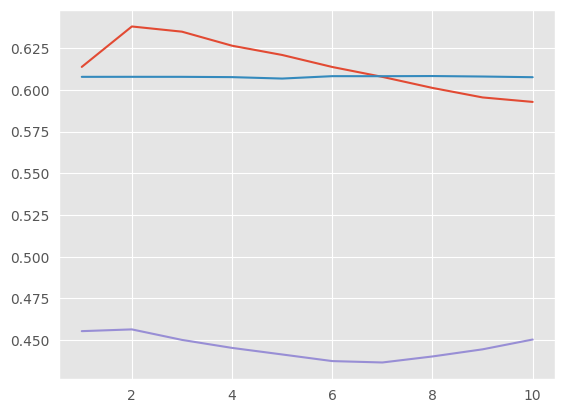

In [48]:
sns.lineplot(x=plot_x,y=human_y)
sns.lineplot(x=plot_x,y=random_y)
sns.lineplot(x=plot_x,y=fish_y)

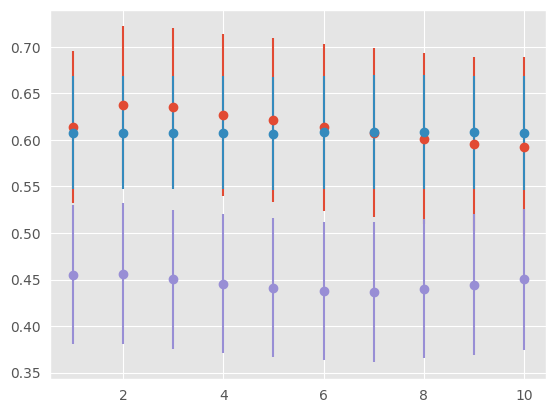

In [47]:

fig,ax=plt.subplots()
ax.errorbar(plot_x,human_y,yerr=human_std*0.5,fmt='o')
ax.errorbar(plot_x,random_y,yerr=random_std*0.5,fmt='o')
ax.errorbar(plot_x,fish_y,yerr=fish_std*0.5,fmt='o')



plt.show()

In [9]:
%matplotlib qt
sns.histplot(data=cleanedhumanseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='Human',bins=1000)
sns.histplot(data=humanseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='old Human',bins=1000)
#sns.histplot(data=gcadjdlseqs,x="Sequence Length",stat='percent',common_norm=False,kde=True,label='Random',bins=150)
plt.legend()
plt.xlim([0,2000])
plt.show()

ImportError: Cannot load backend 'QtAgg' which requires the 'qt' interactive framework, as 'headless' is currently running

In [ ]:
%matplotlib qt

sns.histplot(cleanedhumanseqs,x="GC Content",label='new',stat='percent',common_norm=False,bins=100)
sns.histplot(humanseqs,x="GC Content",label='old',stat='percent',common_norm=False,bins=100)
plt.legend()
plt.show()

In [ ]:
print(cleanedhumanseqs['GC Content'].median())
print(humanseqs['GC Content'].median())

In [ ]:
#MFE
%matplotlib qt
fig5, axs5 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.scatterplot(cleanedhumanseqs,x="Sequence Length",y="MFE",ax=axs5[0],label='Human',s=10,color='#448FA3')
sns.scatterplot(humanseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='old Human',s=10,color='#448FA3')
#sns.scatterplot(gc50dlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random GC 50',s=10,color='#448FA3')
#sns.scatterplot(gcadjdlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random GC adjusted',s=10,color='#0197F6')
sns.lineplot(x=x,y=-0.42*x,ax=axs5[0],color='#D7263D')
sns.lineplot(x=x,y=-0.42*x,ax=axs5[1],color='#D7263D')

In [ ]:
fig6, axs6 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.histplot(x=humanseqs["MFE"]/humanseqs["Sequence Length"],ax=axs6[0],stat='probability',label='Human')
sns.histplot(x=cleanedhumanseqs["MFE"]/cleanedhumanseqs["Sequence Length"],ax=axs6[1],stat='probability',label='old Human')
for ax in axs6:
    ax.set_xlabel('MFE per bp')
    ax.legend()

In [ ]:
%matplotlib qt
fig,axs = plt.subplots(nrows=1, ncols=2,sharey=True,layout='constrained' )
im1= axs[0].hist2d(gc50seqs['GC Content'],gc50seqs['all uORFs'],norm=colors.LogNorm(),cmap='inferno',bins=10)
im2= axs[1].hist2d(gcadjseqs['GC Content'],gcadjseqs['all uORFs'],norm=colors.LogNorm(),cmap='inferno',bins=10)
axs[0].set_title("50% GC Content")
axs[1].set_title("60.81% GC Content")
#fig.colorbar(im1[3],ax=axs[0])
fig.colorbar(im2[3],ax=axs[1])
fig.suptitle('GC Content vs uORF counts',fontsize=14)
plt.show()

In [ ]:
sns.violinplot(data=counts,x='Group',y='all uORFs');
plt.ylim(0,100)
plt.show()

In [ ]:
%matplotlib qt
im3=sns.histplot(x=counts["all ouORFs"],hue=counts["Group"],multiple="dodge",binwidth=0.4)
im3.set_yscale('log')
im3.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
im3.set_xlabel("ouORFs")
plt.title('ouORFs by Group')
plt.show()

In [ ]:
%matplotlib qt
fig2, axs2=plt.subplots(1,2,layout='constrained',sharey=True,sharex=True,figsize=(10,5) )
sns.histplot(x=gcadjdlseqs["ACG_uORFs"],stat='probability',bins=60,ax=axs2[0],color='#0197F6',discrete=True,common_norm=False)
sns.histplot(x=humanseqs["ACG_uORFs"],stat='probability',bins=60,ax=axs2[0],color='#D7263D',discrete=True,common_norm=False)
sns.histplot(x=gcadjdlseqs["ACG_frame1_uORFs"],ax=axs2[1],stat='probability',bins=60,label='Random',color='#0197F6',discrete=True,common_norm=False)
sns.histplot(x=humanseqs["ACG_frame1_uORFs"],ax=axs2[1],stat='probability',bins=60,label='Human',color='#D7263D',discrete=True,common_norm=False)


for ax in axs2:
        #ax.set_yscale('log')
        ax.set_xlabel("")
        ax.set_xlim(0,20)
        ax.set_xticks([0,5,10,15,20])
        ax.minorticks_on()
axs2[0].set_title("All frames")
axs2[1].set_title("First frame")

plt.legend(loc='upper right')
fig2.suptitle('Human ACG uORFs in all reading frames',fontsize=14)
plt.show()

In [ ]:
%matplotlib qt
fig3, axs3 =plt.subplots(2,1,layout='tight',sharey=True)
#sns.histplot(x=gc50seqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0,0])
#sns.histplot(x=gcadjseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0,1])
sns.histplot(x=humanseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[0],binwidth=1)
sns.histplot(x=gcadjdlseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[1],label='GC adjusted',binwidth=1)
sns.histplot(x=gc50dlseqs['AUG_max_uORF_length'],stat="probability",ax=axs3[1],label='GC 50',binwidth=1)

for ax in axs3:
    ax.minorticks_on()
    ax.set_xlabel("")
    ax.set_xlim(0,1000)
        #ax.set_xscale('log')
#axs3[0,0].set_title("Random GC=50")
#axs3[0,1].set_title("Random GC adjusted")

axs3[0].set_title("Human")
axs3[1].set_title("Random")
axs3[1].legend(loc='upper right')
fig3.suptitle("Length distribution of uORFs",fontsize=14)
#fig3.delaxes(axs3[1,0])
plt.show()

In [ ]:
%matplotlib qt
hue_order=['Random_dl_gc50','Random_dl_gc_adjusted']
im4= sns.histplot(lengthdistributed,x='ACG_uORFs',hue='Group',hue_order=hue_order,discrete=True)
im4.set_xscale('log')
plt.show()

In [ ]:
#overlapping uORFs in allen reading Frames
fig2, axs2=plt.subplots(1,2,layout='constrained',sharey=True,sharex=True,figsize=(10,5) )
sns.histplot(x=humanseqs["GUG_uORFs"],multiple="dodge",ax=axs2[0],bins=30)
sns.histplot(x=humanseqs["GUG_frame3_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 3',kde=True)
sns.histplot(x=humanseqs["GUG_frame2_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 2')
sns.histplot(x=humanseqs["GUG_frame1_uORFs"],multiple="dodge",ax=axs2[1],legend=False,bins=20,label='Frame 1')
for ax in axs2:
        #ax.set_yscale('log')
        ax.set_xlabel("")
axs2[0].set_title("Alle Frames")
axs2[1].set_title("Einzelne Frames")

plt.legend(loc='upper right')
fig2.suptitle('uORFs in all reading frames',fontsize=14)
plt.show()

In [ ]:
lengthdistributed=pd.concat([humanseqs,randomseqs],axis=0)
lengthdistributed

In [ ]:
%matplotlib qt
sns.histplot(data=humanseqs,x="ACG_ouORFs",stat="percent",discrete=True,bins=100,common_norm=False,label="Human")
sns.histplot(data=gcadjdlseqs,x="ACG_ouORFs",stat="percent",discrete=True,bins=100,common_norm=False,label="Random")

#plt.yscale("log")
#plt.xscale("log")
plt.xlim([0,1,2,3])
plt.ylim([0,60])
plt.legend(loc="upper right")
plt.show()

In [ ]:
%matplotlib qt
ax=sns.violinplot(data=counts, x="GC Content",y="Group",order=['Human','Random_dl_gc_adjusted','Random_dl_gc50','Random_gc_adjusted','Random_gc50'])
ax.set_xlim([0,1])
#plt.yticks(labels=['Human','','Random_dl_gc50','Random_gc_adjusted','Random_gc50'])
#ax.set_xticks([0,1,2,3,4])
plt.show()

In [ ]:
%matplotlib qt
sns.histplot(gcadjseqs,x="MFE",stat='probability',label='Random gc adjusted',bins=100,common_norm=False,color='#19647E')
sns.histplot(gc50seqs,x="MFE",stat='probability', label='Random gc 50',bins=100,common_norm=False,color='#87B6A7')
sns.histplot(human160seqs,x="MFE",stat='probability',label='Human',bins=100,common_norm=False,color='#F7D08A')
plt.legend()
plt.title(" MFE of Human and Randomly generated 160nt long 5'UTRs ")
plt.show()

In [ ]:
interestingseqs=pd.concat([humanseqs,fishseqs,gcadjdlseqs],axis=0)
interestingseqs

In [ ]:
sns.histplot(interestingseqs,x="AUG_frame1_ouORFs",hue="Group",stat='probability',binwidth=0.25,multiple='dodge',common_norm=False)
#plt.legend()
plt.xticks([0,1])
plt.ylim([0,1])

plt.show()

In [ ]:
len(humanseqs.loc[humanseqs["AUG_frame1_ouORFs"]==0])/len(humanseqs)

In [ ]:
fig5, axs5 = plt.subplots(1,2,layout='constrained',sharex=True,sharey=True,figsize=(10,5))
sns.scatterplot(humanseqs,x="Sequence Length",y="MFE",ax=axs5[0],label='Human')
sns.scatterplot(gc50dlseqs,x="Sequence Length",y="MFE",ax=axs5[1],label='Random')
plt.savefig('data/MFE.png')

In [ ]:
seqs = []
seqIDs = []
for seq_record in SeqIO.parse("data/gencode_5utrs_human_cleaned.fa", "fasta"):
    seqs.append(str(seq_record.seq))
    seqIDs.append(seq_record.id)
seqs = np.vstack((np.array(seqIDs), np.array(seqs))).T
humangroup = np.array([['Human'] * len(seqs)])
seqs = np.concatenate((seqs, humangroup.T), axis=1)  #!!!!

In [ ]:
gcchains=src.rna_analysis.GC_dinucleotides(seqs)
gcchains

In [ ]:
src.human_sequences.delDupes(cleanedhumanseqs)

In [ ]:
rightseqs=list(cleanedhumanseqs[:,0])
allseqs=list(humanseqs.index)

In [ ]:
wrongseqs=[]
for i in allseqs:
    if i in rightseqs:
        pass
    else:
        wrongseqs.append(i)
        
len(wrongseqs)

In [ ]:
with open("data/wrongseqIDs.json",'w') as f:
    json.dump(wrongseqs,f)

In [ ]:
print(82954-43419)

In [ ]:
corr_mfe_seqs

In [ ]:
new_dataset=pd.merge(corr_mfe_seqs.reset_index(),corr_seqs.reset_index())
new_dataset.set_index('SeqID',inplace=True)

In [ ]:
new_dataset

In [ ]:
new_dataset.to_csv("data/new_dataset.csv")

In [ ]:
x=0
for seq in dataset['Sequence']:
    x+=1
    print(type(seq))
    if x>=10:
        break

In [ ]:
quotient, remainder = divmod(325,200)


In [ ]:
binints=[quotient + 1] * remainder + [quotient] * (200 - remainder)
print(binints)
len(binints)

In [ ]:
l=[(0,1),(1,23),(4000,3219)]
print(*l)

In [ ]:
def substringcount(ini_str,sub_str):



    res = sum([1 for i in range(len(ini_str)-len(sub_str)+1) if ini_str[i:i+len(sub_str)] == sub_str])

    return res
#This code is contributed by Edula Vinay Kumar Reddy

        

In [ ]:
randomstring="bababaaababaabaababbabbbababababbabbbabbaaabbabababababababbabbababababababbbabbababbababbabaaabababbbabbabbabbb"
pool=['a','b']
counter=0
for base1 in pool:
    for base2 in pool:
        counter+=substringcount(randomstring,base1+base2)
print(counter,len(randomstring))


In [ ]:
randomseq={"Sequence":["AGCGAGCGAGCGAGUAGUGUCUUCGAUUAC"]}
count=substringcount(randomseq["Sequence"][0],"A")
print(count/len(randomseq["Sequence"][0]))

In [ ]:
mockdf=pd.DataFrame({"Sequence":[np.array([1,2,3]),np.array([4,5,6]),np.array([7,8,9]),np.array([10,11,12])]})
mocktpl=tuple(mockdf["Sequence"])

print(np.vstack(mocktpl))
mockmean=np.mean(mocktpl,axis=0)
print(mockmean)

In [ ]:
result=src.rna_analysis.markov_matrix(humanseqs)

In [ ]:
#mat1=np.matmul(result[2],result[2])
mat1=result[2]
print(mat1)

In [ ]:
np.save("data/human_matrix.npy",mat1)

In [6]:
liste1=np.array([1,2,3])
liste2=np.array([4,5,6])
arr1=np.vstack((liste1,liste2))

In [40]:
mockstd=np.std(arr1,axis=0)
mockmean=np.mean(arr1,axis=0)
x=[1,2,3]

<ErrorbarContainer object of 3 artists>

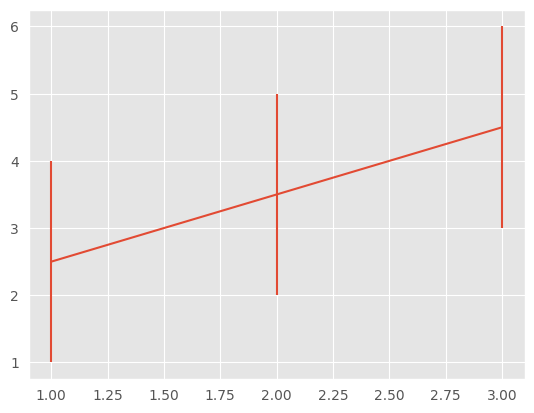

In [44]:
plt.errorbar(x,mockmean,yerr=mockstd)


In [2]:
for i in range(0,10):
    if i==2:
        continue
    print(i)

0
1
3
4
5
6
7
8
9


In [2]:
gtf= pr.read_gtf("data/Homo_sapiens.GRCh38.113.gtf")
gtf_df= gtf.df
#print(gtf_df.columns)
print(gtf_df[gtf_df["Feature"]=='five_prime_utr'])

KeyboardInterrupt: 

In [6]:
fputrs=gtf_df[gtf_df['Feature']=='five_prime_utr']
yeastseqs_raw=src.human_sequences.readFASTA('data/Saccharomyces_cerevisiae.R64-1-1.dna.toplevel.fa','yeast')
print(yeastseqs_raw)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
Gcount=0
Ccount=0
Acount=0
Ucount=0
length=0
for seq in humanseqs["Sequence"]:
    current=seq.count('G')+seq.count('C')+seq.count('A')+seq.count('U')
    if current==len(seq):
        Gcount+=seq.count('G')
        Ccount+=seq.count('C')
        Acount+=seq.count('A')
        Ucount+=seq.count('U')
        length+=len(seq)
        

        

print(Gcount+Ccount+Acount+Ucount,length)
G=Gcount/length
C=Ccount/length
A=Acount/length
U=Ucount/length
print(sum([A,C,G,U]))

10597331 10597331
1.0


In [6]:
 with open('data/mononucleotides.json','w') as outfile:
    json.dump([A,C,G,U],outfile)

In [7]:
with open('data/mononucleotides.json','r') as infile:
    monos_p=json.load(infile)
monos_p

[0.20525922989477255,
 0.2895526241465894,
 0.30204180656431323,
 0.20314633939432486]

In [7]:
dist1=np.array([0.3,0.5,0.2,0])
dist2=np.array([0.1,0.2,0.6,0.1])

In [9]:
for i,j in zip(dist1,dist2):
    print(i+j)

0.4
0.7
0.8
0.1


In [12]:
kldseqs=pd.read_csv("data/random_train_pc.csv")
kldseqs.columns

Index(['Unnamed: 0', 'utr', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', 'total_reads', 'total', 'r0', 'r1', 'r2', 'r3',
       'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'rl',
       'KLD', 'KLD1', 'KLD2', 'KLD05', 'KLD025', 'KLD01'],
      dtype='object')

In [14]:
kld1=kldseqs['KLD1']
kld2=kldseqs['KLD2']

In [15]:


kld05=kldseqs['KLD05']
kld025=kldseqs['KLD025']
kld01=kldseqs['KLD01']

In [21]:
%matplotlib qt



sns.kdeplot(x=kld1,label='KLD, pseudocount=1')
sns.kdeplot(x=kld2,label='KLD, pseudocount=2')
sns.kdeplot(x=kld05,label='KLD, pseudocount=0.5')
sns.kdeplot(x=kld025,label='KLD, pseudocount=0.25')
sns.kdeplot(x=kld01,label='KLD, pseudocount=0.1')
plt.xlabel("KLD")
plt.xlim([0,3])
plt.ylabel("Density")
plt.legend()

In [1]:
exp_humanseqs=pd.read_csv('data/50nt_human_utrs_filtered.tsv',sep='\t')
exp_humanseqs

NameError: name 'pd' is not defined

In [ ]:
exp_humanseqs.sort_values('total',ascending=False)

In [5]:
testseqs=exp_humanseqs[0:5000]
len(testseqs)

5000

In [12]:
valseqs=exp_humanseqs[5000:10000]
valseqs

,Unnamed: 0,utr,rl,library,total
5000,9740,TTCTGTCACCTGTGACGCGCGGCCTCCTCAGCCTCTTTCCTCCCGC...,7.054704,human_utrs,1752
5001,9742,TTCAGAGGCTTTTAGTGAAATGAGATTATATTCTCCTGCCTTTTAA...,6.192395,human_utrs,1752
5002,9744,GCGTTCATTCCTGCCGCTGCCGCCGCCGCCGCCGAGGTCCCGCACC...,6.520442,human_utrs,1752
5003,9745,TCCCGGAAGGAGGAGCGGAGGCCGCGCGCGGCCCGCCGAGCGCCTT...,5.132369,human_utrs,1752
5004,9746,CCCCACTTGCTGTCGAGTTCAGAAGCCTCCTGGCAGACACTGGAGC...,6.621395,human_utrs,1751
...,...,...,...,...,...
9995,19776,CCGCCTCCGGCGCCGCCCGCTGAGCCCTGTTTTCCGCAGGTCCGGG...,5.568332,human_utrs,1002
9996,19777,CTTGCCTGAGAGGACCCACCTCTGAGTGTCCAGTGGTCAGTTGCCC...,6.782462,human_utrs,1002
9997,19780,GCGTGGGCCAGGAAATCACATCCTATACTGCCCAGGAGCCAGACAC...,6.406114,snv,1001
9998,19781,CCGCAGCTGCAGCCCTGTATTGAGCTGAGATGGCTCGAGCCTAACA...,4.225735,human_utrs,1001


In [9]:
sampleseqs=exp_humanseqs[10000:]

In [13]:
testseqs.to_csv('data/human_test.csv')
valseqs.to_csv('data/human_val.csv')
sampleseqs.to_csv('data/human_sample.csv')